In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as font_manager
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
from matplotlib.patches import RegularPolygon
import matplotlib.patheffects as path_effects

In [2]:
import LanusStats as ls  
fotmob = ls.FotMob()

In [3]:
background_color = "blanchedalmond"

# Import the font you want to use or use the default ones
font_path_reg = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_reg = font_manager.FontProperties(fname=font_path_reg)

font_path_bold = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_bold = font_manager.FontProperties(fname=font_path_bold)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = font_manager.FontProperties(fname=font_path_med)

In [4]:
david = fotmob.get_player_shotmap("1", "0", 939569)
david_uefa = fotmob.get_player_shotmap("1", "2", 939569)

In [5]:
david.head()

,id,playerName,eventType,shotType,situation,teamId,playerId,x,y,min,...,homeTeamName,awayTeamName,homeScore,awayScore,matchId,matchDate,teamColor,teamColorDark,blockedX,blockedY
0,2710021591,Jonathan David,Post,Header,RegularPlay,8639,939569,97.473684,30.950000,90,...,Reims,Lille,0,2,4513012,2024-08-17T17:00:00Z,#E01D13,#E01D13,NaN,NaN
1,2710023223,Jonathan David,Goal,LeftFoot,RegularPlay,8639,939569,101.681034,37.732000,90,...,Reims,Lille,0,2,4513012,2024-08-17T17:00:00Z,#E01D13,#E01D13,NaN,NaN
2,2719545285,Jonathan David,Miss,LeftFoot,RegularPlay,8639,939569,98.631579,45.261911,74,...,Saint-Etienne,Lille,1,0,4513890,2024-09-13T18:45:00Z,#E01D13,#E01D13,NaN,NaN
3,2723490857,Jonathan David,AttemptSaved,RightFoot,RegularPlay,8639,939569,75.615049,38.452381,41,...,Lille,Strasbourg,3,3,4513899,2024-09-21T15:00:00Z,#E01D13,#E01D13,88.177941,34.0
4,2723574547,Jonathan David,Goal,RightFoot,Penalty,8639,939569,94.000000,34.000000,84,...,Lille,Strasbourg,3,3,4513899,2024-09-21T15:00:00Z,#E01D13,#E01D13,NaN,NaN


In [6]:
david = pd.concat([david, david_uefa], ignore_index=True)

In [7]:
david[david['eventType'] == 'Goal']['shotType'].value_counts(1)

shotType
RightFoot    0.608696
LeftFoot     0.347826
Header       0.043478
Name: proportion, dtype: float64

In [8]:
david['x_opta'], david['y_opta'] = (david['x'] / 105) * 100, (david['y'] / 68) * 100

In [9]:
# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots


total_shots = david.shape[0] #numero righe => tot tiri
total_goals = david[david['eventType'] == 'Goal'].shape[0] #numero righe => tot gol
total_xG = david['expectedGoals'].sum() #somma xG
xG_per_shot = total_xG / total_shots
points_average_distance = david['x'].mean()
actual_average_distance = 105 - (david['x'] * 1.05).mean()


count_type = david[david['eventType'] == 'Goal']['shotType'].value_counts(1)
best_foot = count_type.idxmax().split()[-1]
prc_gol = round(count_type.max()*100,1)

print(points_average_distance, actual_average_distance)

93.82453907369357 6.484233972621752


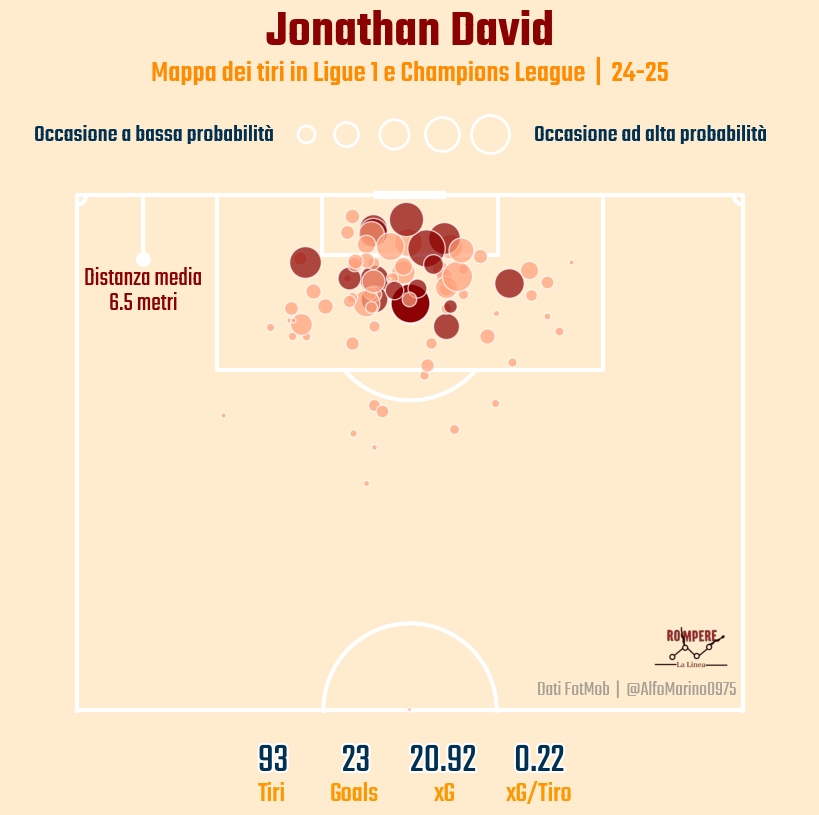

In [10]:
import matplotlib.patheffects as path_effects

path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

pitch = VerticalPitch( 
    pitch_type = "opta", #opta dimension (https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitch_types.html)
    half = True, #displays only half of the field
    pitch_color = background_color, 
    pad_bottom = .5, 
    line_color = "white", 
    #linewidth = .75,
    line_alpha=1,
    axis = True, label = True,
    corner_arcs = True, linewidth = 3
)

# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.65, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.9, 
    s='Jonathan David', 
    fontsize=38, 
    fontproperties=font_bold, 
    color='darkred', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.75, 
    s=f'Mappa dei tiri in Ligue 1 e Champions League  |  24-25', 
    fontsize=22,
    fontproperties=font_med, 
    color='darkorange', 
    ha='center'
)
ax1.text(
    x=0.18, 
    y=0.5, 
    s=f'Occasione a bassa probabilità', 
    fontsize=18, 
    fontproperties=font_med, 
    color="#003153", 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=150, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=450, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=600, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=750, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)

ax1.text(
    x=0.80, 
    y=0.5, 
    s=f'Occasione ad alta probabilità', 
    fontsize=18, 
    fontproperties=font_med, 
    color='#003153', 
    ha='center'
)


ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color="white", 
    linewidth=3
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 5, 
    s=f'Distanza media\n{(actual_average_distance):.1f} metri', 
    fontsize=19, 
    fontproperties=font_reg, 
    color='darkred', 
    ha='center'
)

ax2.text(
    x=16,  # Posizione X per centrare il testo
    y=52,  # Posizione Y nel campo, puoi regolarla a tuo piacimento
    s='Dati FotMob  |  @AlfoMarino0975',
    fontsize=15,  # Dimensione del font
    fontproperties=font_reg,  # Proprietà del font
    color='grey',  # Colore del testo
    ha='center',  # Allineamento orizzontale
    va='center',  # Allineamento verticale
    alpha=0.7  # Trasparenza del testo, puoi modificarla
)


for x in david.to_dict(orient='records'):
    pitch.scatter(
        x['x_opta'], 
        x['y_opta'], 
        s=1000 * x['expectedGoals'],  
        color='darkred' if x['eventType'] == 'Goal' else 'lightsalmon',
        ax=ax2,
        alpha=.7,
        linewidth=1,
        edgecolor='white'
    )

ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.31, 
    y=0, 
    s='Tiri', 
    fontsize=20, 
    fontproperties=font_med, 
    fontweight='bold', 
    color='#fd9800', 
    ha='left'
)

ax3.text(
    x=0.31, 
    y=0.5, 
    s=f'{total_shots}', 
    fontsize=30, 
    fontproperties=font_reg, 
    color='#003153', 
    ha='left',
    path_effects=path_eff
)

ax3.text(
    x=0.4, 
    y=0, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_med, 
    fontweight='bold', 
    color='#fd9800', 
    ha='left'
)

ax3.text(
    x=0.415, 
    y=0.5, 
    s=f'{total_goals}', 
    fontsize=30, 
    fontproperties=font_reg, 
    color='#003153', 
    ha='left', path_effects=path_eff
)

ax3.text(
    x=0.53, 
    y=0, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_med, 
    fontweight='bold', 
    color='#fd9800', 
    ha='left'
)

ax3.text(
    x=0.5, 
    y=0.5, 
    s=f'{total_xG:.2f}', 
    fontsize=30, 
    fontproperties=font_reg, 
    color='#003153', 
    ha='left', path_effects=path_eff
)

ax3.text(
    x=0.62, 
    y=0, 
    s='xG/Tiro', 
    fontsize=20, 
    fontproperties=font_med, 
    fontweight='bold', 
    color='#fd9800', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=0.5, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=30, 
    fontproperties=font_reg, 
    color='#003153', 
    ha='left', path_effects=path_eff
)

ax3.set_axis_off()


def getImage(path):
   return OffsetImage(plt.imread(path), zoom=1)

logo = plt.imread("/Users/alfonsomarino/Desktop/Progetti/IMG_2978.PNG")
logo_ax = fig.add_axes([0.7,0.28, 0.3, 0.10])
logo_ax.imshow(logo)
logo_ax.axis('off')

output_path = "/Users/alfonsomarino/Desktop/retegui_shot_plot.png"
#fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())